In [32]:
import numpy as np
import solver
import importlib
import matplotlib.pyplot as plt
import itertools
importlib.reload(solver)

<module 'solver' from '/home/yamamoto/ctqmc/solver.py'>

In [33]:
beta = 10
p = {'beta': beta, 'J': 1.0, 'Hx': 10.0,
     'L': 100, 'ntot': 10, 'measure_interval': 1}
S = solver.Solver(**p)
# S = solver.Solver(p['beta'], p['J'], p['Hx'], p['L'],
#                  p['M'], p['ntot'], p['measure_interval'])

In [34]:
C, n = S.gen_conf()
print(C[0])

[[ 0.31405953  1.        ]
 [ 1.65948156  1.        ]
 [ 1.78868713 -1.        ]
 [ 2.59195595 -1.        ]
 [ 3.78148014 -1.        ]
 [ 5.75203711  1.        ]
 [ 6.5951877  -1.        ]
 [ 7.50436031 -1.        ]
 [ 8.58603147 -1.        ]
 [ 9.00639255 -1.        ]
 [ 9.50637583 -1.        ]
 [ 9.70920808  1.        ]]


In [35]:
Cp = []
for Cx in C:
    Cp.append(np.concatenate([[[0, Cx[-1, 1]]], Cx, [[beta, Cx[-1, 1]]]]))

In [45]:
Cp[0].shape

(14, 2)

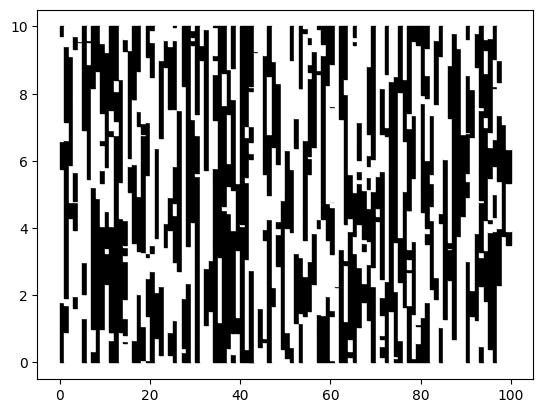

In [48]:
colors = {-1: 'w', 1: 'k'}
fig, ax = plt.subplots()
for ix, Cpx in enumerate(Cp):
    for itau in range(Cpx.shape[0]-1):
        ax.fill([ix, ix+1, ix+1, ix], [Cpx[itau, 0], Cpx[itau, 0], Cpx[itau+1, 0],
                Cpx[itau+1, 0]], color=colors[int(Cpx[itau, 1])])
#for itau in range(n+1):
#    ax.fill([0, 1, 1, 0], [Cp[0][itau, 0], Cp[0][itau, 0], Cp[0][itau+1, 0],
#            Cp[0][itau+1, 0]], color=colors[int(Cp[0][itau, 1])])

In [44]:
C

array([[ 0.06721622,  1.        ],
       [ 3.52840531,  1.        ],
       [ 5.44035602, -1.        ],
       [ 5.50213697,  1.        ],
       [ 5.85156714, -1.        ],
       [ 6.06814632,  1.        ],
       [ 7.53084494, -1.        ],
       [ 7.81236837, -1.        ],
       [ 8.08951694, -1.        ],
       [ 9.10113694,  1.        ]])

In [45]:
C = np.array([[1, -1], [2, -1], [3, -1]])

In [46]:
C_removed = S.remove_cut(C)

In [47]:
C_removed

array([], shape=(0, 2), dtype=float64)

In [48]:
Cp_removed = np.concatenate(
    [[[0, C_removed[-1, 1]]], C_removed, [[beta, C_removed[-1, 1]]]])

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
C_removed

array([[ 1.33984022,  1.        ],
       [ 1.8081023 , -1.        ],
       [ 3.49623574,  1.        ],
       [ 4.90698253, -1.        ],
       [ 8.04748696,  1.        ],
       [ 8.33858871, -1.        ]])